**CHAPTER 2**
**End to End Machine Learning Project**

This chapter walks through a complete end-to-end Machine Learning project using a real-world scenario where the reader acts as a newly hired data scientist at a real estate company. It starts by defining the overall problem and business objective, then moves on to collecting the data, exploring and visualizing it to gain insights, and preparing it for Machine Learning algorithms. After that, a suitable model is selected, trained, and fine-tuned to improve its performance. The chapter also emphasizes the importance of clearly presenting the final solution to stakeholders, and it concludes with deploying the system as well as monitoring and maintaining it to ensure long-term reliability and performance.

**Working with Real Data**
This section explains that learning Machine Learning is best done using real-world data rather than artificial datasets, and it introduces several popular sources for open datasets such as Kaggle, the UCI Machine Learning Repository, and AWS datasets. For this chapter, the California Housing Prices dataset is used, which is based on data from the 1990 California census and contains information such as population, median income, and median house prices for each district. The goal is to build a model that can predict the median housing price in any district based on these features. The section also emphasizes starting the project by understanding the big picture and using a structured Machine Learning project checklist to ensure the work is well organized and follows proper scientific procedures.

**Get the Data**
This section explains the practical beginning of a Machine Learning project by setting up the working environment, downloading the dataset, and performing an initial exploration of the data. The user is guided to install Python, create a workspace, set up an isolated virtual environment, and install essential libraries such as NumPy, pandas, Matplotlib, Jupyter, and Scikit-Learn. After that, the California Housing dataset is automatically downloaded using a Python function and loaded into a pandas DataFrame. A quick inspection of the dataset structure is performed using methods such as head(), info(), value_counts(), and describe(). Data visualization is introduced through histograms to understand distributions, detect capped values, observe different feature scales, and identify skewed (tail-heavy) data. Finally, the section emphasizes the critical importance of creating a test set before performing any deeper analysis to avoid data leakage and ensure fair model evaluation.


In [44]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  os.makedirs(housing_path, exist_ok=True)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

In [45]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

In [46]:
#Display First Five Rows
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
3465,-118.46,34.31,24.0,2920.0,601.0,1460.0,598.0,4.2708,<1H OCEAN
15290,-117.31,33.11,7.0,7974.0,1703.0,2904.0,1550.0,4.1282,NEAR OCEAN
10779,-117.91,33.65,17.0,1328.0,377.0,762.0,344.0,2.2222,<1H OCEAN
14038,-117.14,32.75,37.0,1832.0,525.0,955.0,488.0,2.7852,NEAR OCEAN
1100,-121.75,39.88,16.0,2867.0,559.0,1203.0,449.0,2.7143,INLAND


In [12]:
#Dataset Structure
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [13]:
#Categorical Data Count
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,7277
INLAND,5262
NEAR OCEAN,2124
NEAR BAY,1847
ISLAND,2


In [14]:
#Statistical Summary
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


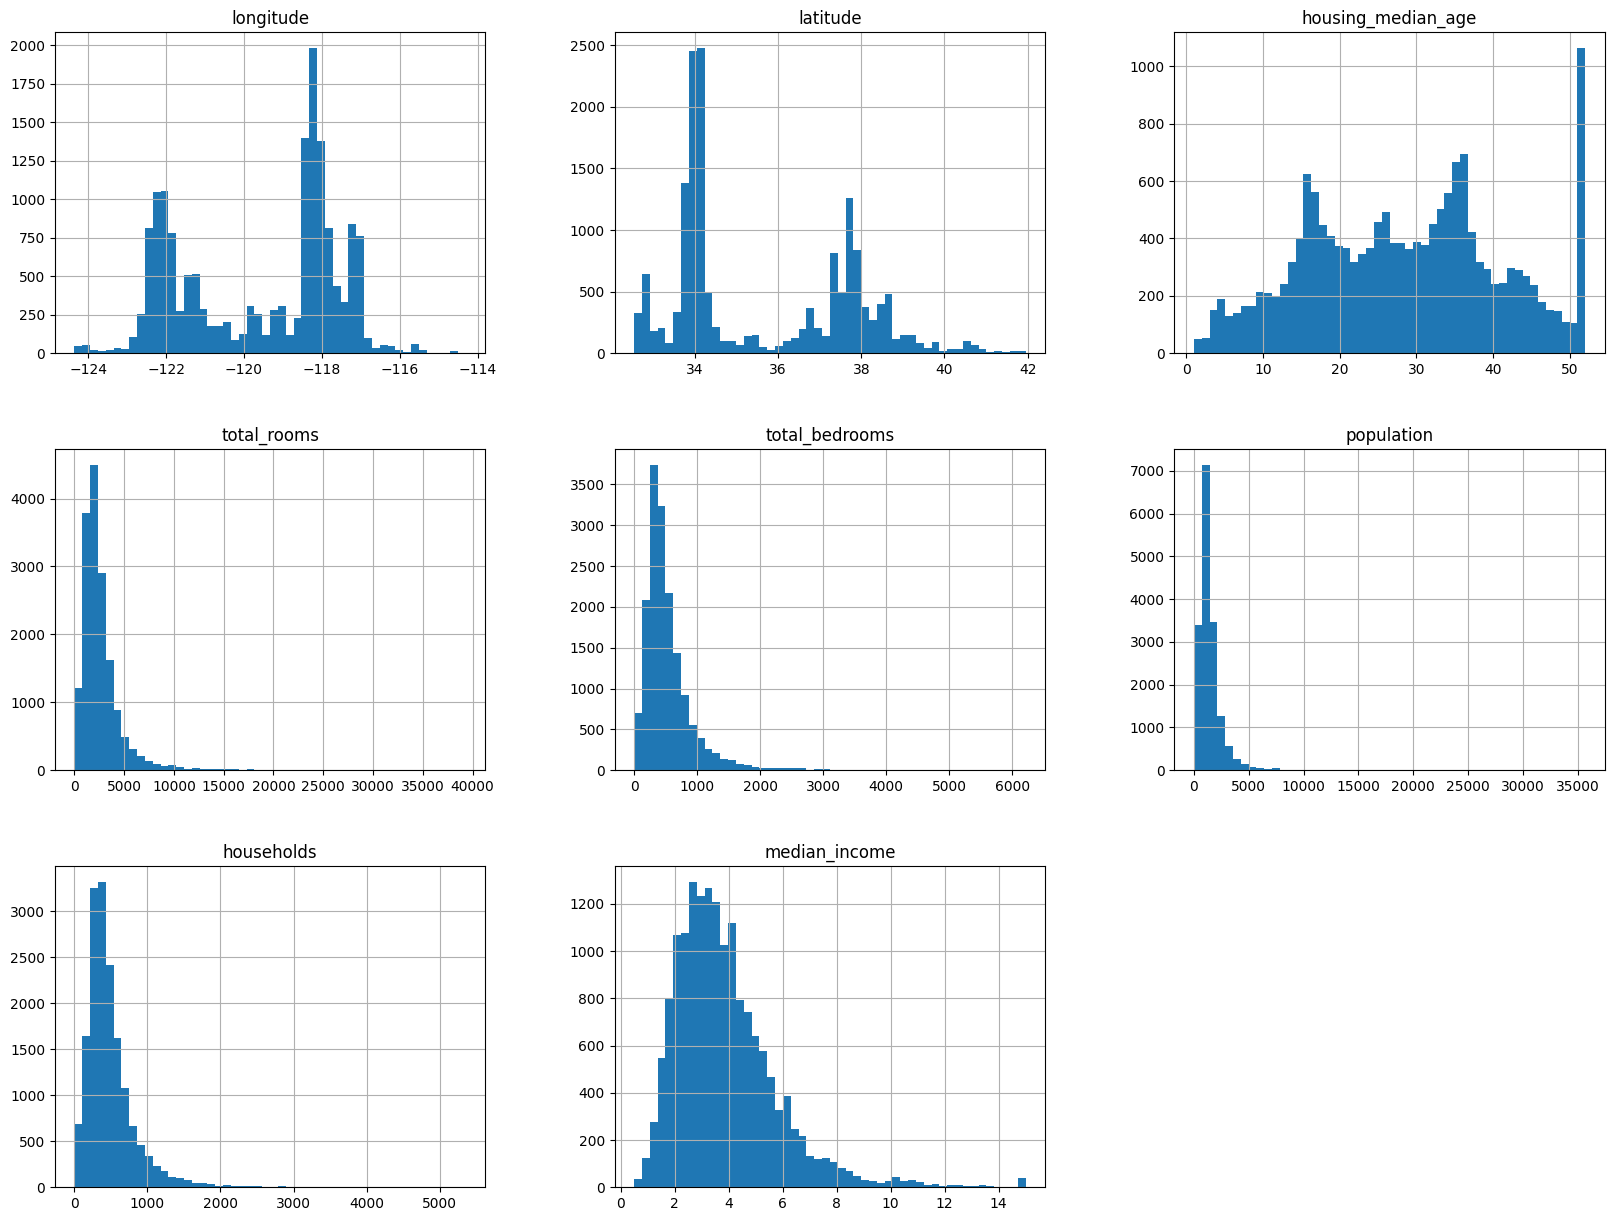

In [15]:
#Data Visualization
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

**Create a Test Set**

Before any deep data exploration, a test set must be created and set aside to avoid data snooping bias. This bias occurs when patterns from the test data influence the training process, leading to overly optimistic performance results. A common practice is to split 20% of the dataset as the test set. However, simple random sampling can change every time the code is run, so a more stable splitting method is preferred, such as using a fixed random seed, hashing IDs, or stratified sampling.


In [17]:
#Manual Random Split
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)

In [18]:
#Stable Split Using Hash ID
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")


In [19]:
#Using Scikit-Learn
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

**Stratified Sampling Based on Income**

Simple random sampling may lead to biased data distributions. Stratified sampling ensures that the test set accurately represents the population by preserving the distribution of key features. In this case, median income is used as a stratification attribute. The income values are grouped into categories before performing the split.


In [20]:
#Create Income Categories
housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)

<Axes: >

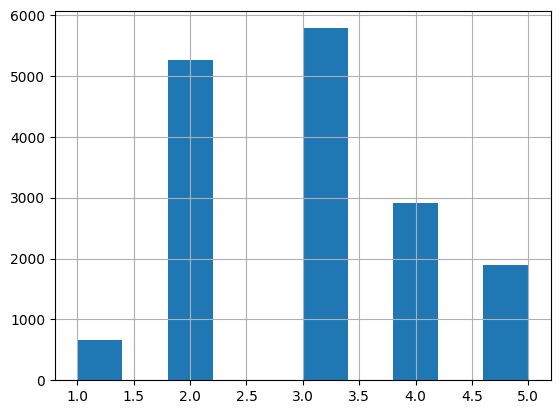

In [22]:
housing["income_cat"].hist()

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.iloc[train_index]
  strat_test_set = housing.iloc[test_index]

In [29]:
strat_test_set["income_cat"].value_counts()

,count
income_cat,
3,1158
2,1053
4,582
5,378
1,132


In [30]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

/tmp/ipython-input-2301637293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis=1, inplace=True)
/tmp/ipython-input-2301637293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis=1, inplace=True)


**Discover and Visualize the Data**

This stage aims to understand the structure and patterns in the data through visualization. Scatter plots show that housing prices are strongly influenced by geographic location and population density.


In [31]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

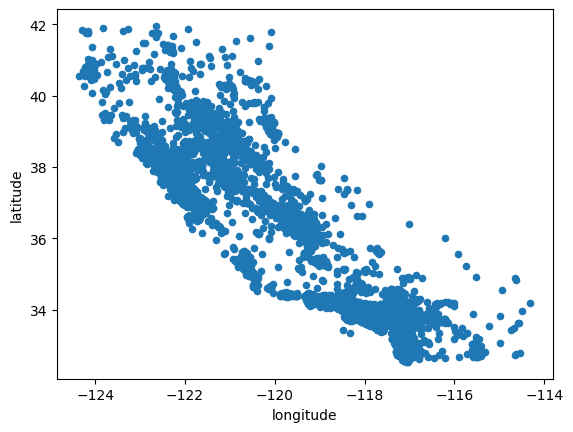

In [32]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

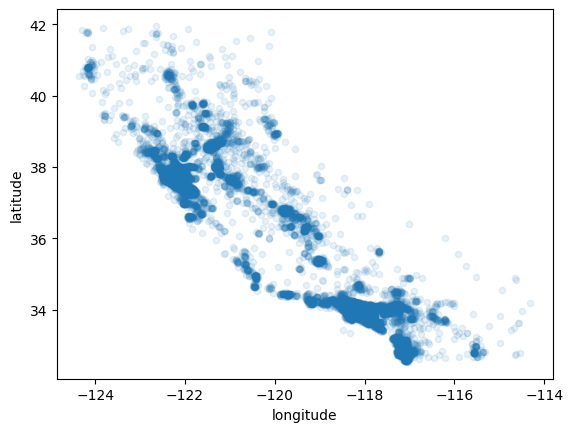

In [33]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

In [40]:
y = housing_labels

**Looking for Correlations**

Correlation analysis helps identify which attributes most strongly affect house prices. The results show that median income has the highest correlation with median house value, making it the most important predictive feature.


In [51]:
import numpy as np

corr_matrix = housing.select_dtypes(include=[np.number]).corr()


In [52]:
housing_num = housing.select_dtypes(include=[np.number]).copy()
housing_num["median_house_value"] = housing_labels

corr_matrix = housing_num.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


,median_house_value
median_house_value,1.000000
median_income,0.689127
total_rooms,0.137820
housing_median_age,0.113667
households,0.066564
total_bedrooms,0.049841
population,-0.023055
longitude,-0.049097
latitude,-0.140593


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

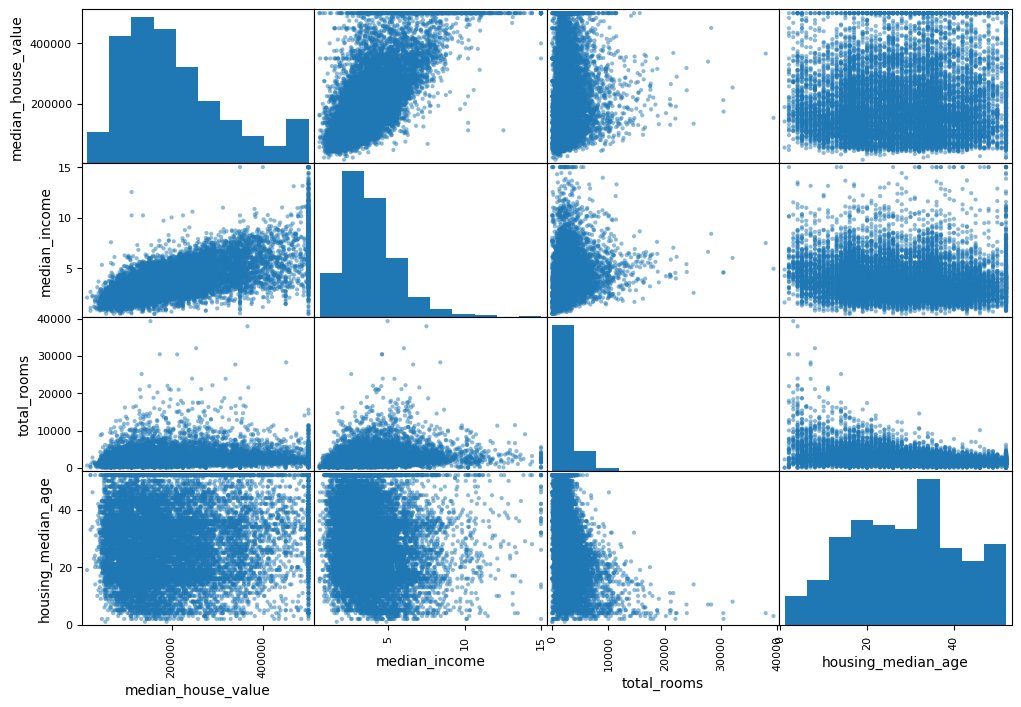

In [54]:
from pandas.plotting import scatter_matrix

housing_sm = housing[[
    "median_income",
    "total_rooms",
    "housing_median_age"
]].copy()

housing_sm["median_house_value"] = housing_labels

attributes = [
    "median_house_value",
    "median_income",
    "total_rooms",
    "housing_median_age"
]

scatter_matrix(housing_sm[attributes], figsize=(12, 8))


<Axes: xlabel='median_income', ylabel='median_house_value'>

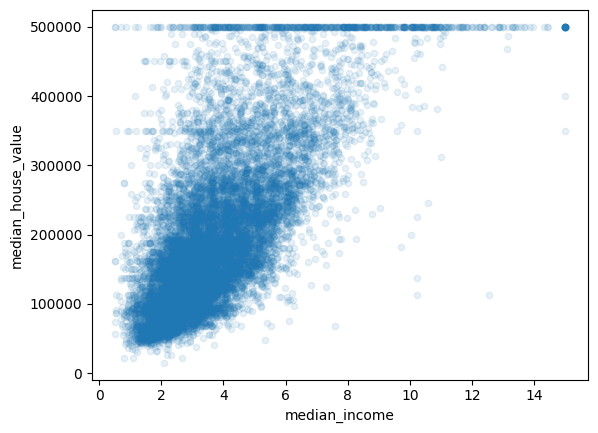

In [58]:
housing_plot = housing.copy()
housing_plot["median_house_value"] = housing_labels

housing_plot.plot(
    kind="scatter",
    x="median_income",
    y="median_house_value",
    alpha=0.1
)

**Experimenting with Attribute Combinations**

New features are engineered to improve model performance, such as:
•	rooms_per_household
•	bedrooms_per_room
•	population_per_household
Among these, bedrooms_per_room shows a stronger correlation with housing prices than total bedrooms alone.


In [59]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [61]:
import numpy as np

housing_corr = housing.select_dtypes(include=[np.number]).copy()
housing_corr["median_house_value"] = housing_labels

corr_matrix = housing_corr.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


,median_house_value
median_house_value,1.000000
median_income,0.689127
rooms_per_household,0.159831
total_rooms,0.137820
housing_median_age,0.113667
households,0.066564
total_bedrooms,0.049841
population_per_household,-0.020827
population,-0.023055
longitude,-0.049097


**Prepare the Data for Machine Learning Algorithms**

The dataset is split into features and labels, and missing values are handled using median imputation to ensure compatibility with Machine Learning algorithms.


In [63]:
import numpy as np

housing_corr = housing.select_dtypes(include=[np.number]).copy()
housing_corr["median_house_value"] = housing_labels

corr_matrix = housing_corr.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


,median_house_value
median_house_value,1.000000
median_income,0.689127
rooms_per_household,0.159831
total_rooms,0.137820
housing_median_age,0.113667
households,0.066564
total_bedrooms,0.049841
population_per_household,-0.020827
population,-0.023055
longitude,-0.049097


In [64]:
housing.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
3465,-118.46,34.31,24.0,2920.0,601.0,1460.0,598.0,4.2708,<1H OCEAN,4.882943,0.205822,2.441472
15290,-117.31,33.11,7.0,7974.0,1703.0,2904.0,1550.0,4.1282,NEAR OCEAN,5.144516,0.213569,1.873548
10779,-117.91,33.65,17.0,1328.0,377.0,762.0,344.0,2.2222,<1H OCEAN,3.860465,0.283886,2.215116
14038,-117.14,32.75,37.0,1832.0,525.0,955.0,488.0,2.7852,NEAR OCEAN,3.754098,0.286572,1.956967
1100,-121.75,39.88,16.0,2867.0,559.0,1203.0,449.0,2.7143,INLAND,6.385301,0.194977,2.679287
...,...,...,...,...,...,...,...,...,...,...,...,...
15082,-116.94,32.80,28.0,3042.0,729.0,1964.0,703.0,2.4141,<1H OCEAN,4.327169,0.239645,2.793741
7604,-118.25,33.88,37.0,1027.0,217.0,1042.0,254.0,2.2121,<1H OCEAN,4.043307,0.211295,4.102362
14494,-117.20,32.85,22.0,3501.0,631.0,1297.0,581.0,4.7891,NEAR OCEAN,6.025818,0.180234,2.232358
9952,-122.32,38.35,20.0,3494.0,549.0,1673.0,541.0,5.5718,INLAND,6.458410,0.157127,3.092421


In [65]:
housing.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
3465,-118.46,34.31,24.0,2920.0,1460.0,598.0,4.2708,<1H OCEAN,4.882943,0.205822,2.441472
15290,-117.31,33.11,7.0,7974.0,2904.0,1550.0,4.1282,NEAR OCEAN,5.144516,0.213569,1.873548
10779,-117.91,33.65,17.0,1328.0,762.0,344.0,2.2222,<1H OCEAN,3.860465,0.283886,2.215116
14038,-117.14,32.75,37.0,1832.0,955.0,488.0,2.7852,NEAR OCEAN,3.754098,0.286572,1.956967
1100,-121.75,39.88,16.0,2867.0,1203.0,449.0,2.7143,INLAND,6.385301,0.194977,2.679287
...,...,...,...,...,...,...,...,...,...,...,...
15082,-116.94,32.80,28.0,3042.0,1964.0,703.0,2.4141,<1H OCEAN,4.327169,0.239645,2.793741
7604,-118.25,33.88,37.0,1027.0,1042.0,254.0,2.2121,<1H OCEAN,4.043307,0.211295,4.102362
14494,-117.20,32.85,22.0,3501.0,1297.0,581.0,4.7891,NEAR OCEAN,6.025818,0.180234,2.232358
9952,-122.32,38.35,20.0,3494.0,1673.0,541.0,5.5718,INLAND,6.458410,0.157127,3.092421


In [66]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [67]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [68]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [69]:
imputer.statistics_

array([-1.18500000e+02,  3.42600000e+01,  2.90000000e+01,  2.10800000e+03,
        4.31000000e+02,  1.16100000e+03,  4.07000000e+02,  3.53630000e+00,
        5.23428571e+00,  2.03031374e-01,  2.81656805e+00])

In [70]:
housing_num.median().values

array([-1.18500000e+02,  3.42600000e+01,  2.90000000e+01,  2.10800000e+03,
        4.31000000e+02,  1.16100000e+03,  4.07000000e+02,  3.53630000e+00,
        5.23428571e+00,  2.03031374e-01,  2.81656805e+00])

In [71]:
X = imputer.transform(housing_num)

In [72]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
index=housing_num.index)

**Handling Categorical Attributes**

The categorical attribute ocean_proximity is converted into numerical format using Ordinal Encoding and One-Hot Encoding so it can be processed by Machine Learning models.


In [73]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
3465,<1H OCEAN
15290,NEAR OCEAN
10779,<1H OCEAN
14038,NEAR OCEAN
1100,INLAND
15524,<1H OCEAN
4288,<1H OCEAN
13540,INLAND
14362,NEAR OCEAN
9739,<1H OCEAN


In [74]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [4.],
       [0.],
       [4.],
       [1.],
       [0.],
       [0.],
       [1.],
       [4.],
       [0.]])

In [75]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [76]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 13209 stored elements and shape (13209, 5)>

In [77]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [78]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

**Custom Transformer for Automated Feature Engineering**

A custom transformer is created to automatically generate new combined attributes during preprocessing using a Scikit-Learn pipeline.


In [80]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]

        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


**Feature Scaling**

Feature scaling is a crucial step in data preprocessing because machine learning algorithms perform better and converge faster when all numerical features are on a similar scale. In real-world datasets, different features often have very different units and ranges. For example, in the housing dataset, attributes such as total_rooms, population, and median_income have vastly different numerical ranges. If scaling is not applied, algorithms that rely on distance calculations, such as Linear Regression with Gradient Descent, k-Nearest Neighbors (KNN), and Support Vector Machines (SVM), may become biased toward features with larger numerical values.
Two main feature scaling techniques are commonly used: Min-Max Scaling and Standardization. Min-Max Scaling transforms values into a fixed range, usually between 0 and 1. This method is highly sensitive to outliers, since extreme values directly affect the minimum and maximum bounds. On the other hand, Standardization (using the StandardScaler) transforms data so that it has a mean of 0 and a standard deviation of 1. This method is more robust against outliers and is widely preferred in most Machine Learning pipelines.
Another important benefit of feature scaling is that it improves numerical stability and helps prevent certain algorithms from suffering from slow or unstable convergence. Without scaling, some features may dominate others during optimization, leading to poor generalization performance. For this reason, feature scaling is considered a mandatory preprocessing step in most professional Machine Learning workflows.

**Transformation Pipeline**

A transformation pipeline is used to apply all data preprocessing steps automatically and in the correct order. It combines numerical feature processing (imputation, feature engineering, and scaling) and categorical feature encoding into one system using Pipeline and ColumnTransformer. This ensures consistent, efficient, and reusable data preparation for Machine Learning models.



In [81]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
  ('imputer', SimpleImputer(strategy="median")),
  ('attribs_adder', CombinedAttributesAdder()),
  ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [82]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
  ("num", num_pipeline, num_attribs),
  ("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)

In [90]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [92]:
from sklearn.linear_model import LinearRegression

In [96]:
housing_prepared.shape[0]
len(housing_labels)


16512

**Randomized Search**

When the hyperparameter space is very large, RandomizedSearchCV is preferred over Grid Search. Instead of testing all combinations, it tests random combinations for a fixed number of iterations. This approach is faster and more efficient for large models.

**Ensemble Methods**

Ensemble learning combines several models to improve accuracy and stability. Random Forest is a classic ensemble that averages the predictions of many decision trees. Ensembles usually perform better than single models because they reduce both bias and variance.

**Analyze the Best Models and Their Errors**

Once the best model is selected, its feature importance is analyzed. This shows which attributes contribute the most to predictions. The most important feature is median income, followed by location and population-related attributes. This information helps improve feature selection and future model improvements.

**Launch, Monitor, and Maintain Your System**

The trained model is then deployed to production, either inside a web application or as a REST API service. After deployment, monitoring is critical to detect performance drops caused by data changes or system failures. The model must be retrained regularly with new data. Input data quality must also be monitored, and backups of models and datasets must be maintained to allow rollback in case of failure.
